In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from airplane_functions import import_clean_data, plotfunction

# Set dataframe max row display
pd.set_option('display.max_row', 200)

# set graph background color
sns.set_style("darkgrid", {'axes.facecolor': '.6'})

%matplotlib inline

#### Useful links
[Where data comes froms.](http://stat-computing.org/dataexpo/2009/the-data.html)<br>

[Explanation of data.](https://www.transtats.bts.gov/Fields.asp?Table_ID=236)

This imports all three csv files, merges them and performs some light cleaning of the data.<br/>
Because 2008.csv is so large, contains more than 7 million rows, it takes a while.<br/>
For this reason I saved the merged dataframe to cut down on future import times.

In [2]:
# df = import_clean_data("2008.csv", "airports.csv", "carriers.csv")
# df.to_csv("data/clean.csv", index=False)

In [3]:
df = pd.read_csv("data/clean.csv")

## Look at canceled flights

In [4]:
# list of months, weeks and cancellation types to use when plotting
m = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
w = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
c = ['Carrier', 'Weather', 'National Air System', 'Security']

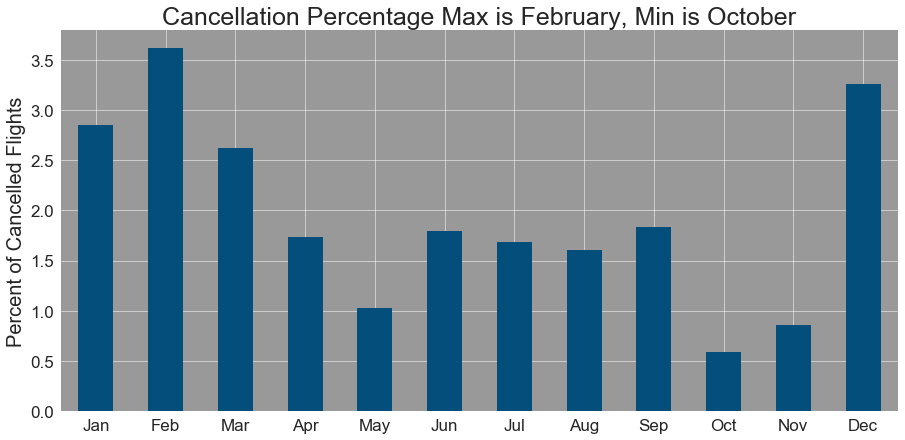

In [5]:
percent_cancelled_month = df.Cancelled.groupby(df.Month).mean()*100
plotfunction(percent_cancelled_month, y_label='Percent of Cancelled Flights', x_labels=m,
             title='Cancellation Percentage Max is February, Min is October'); plt.show()

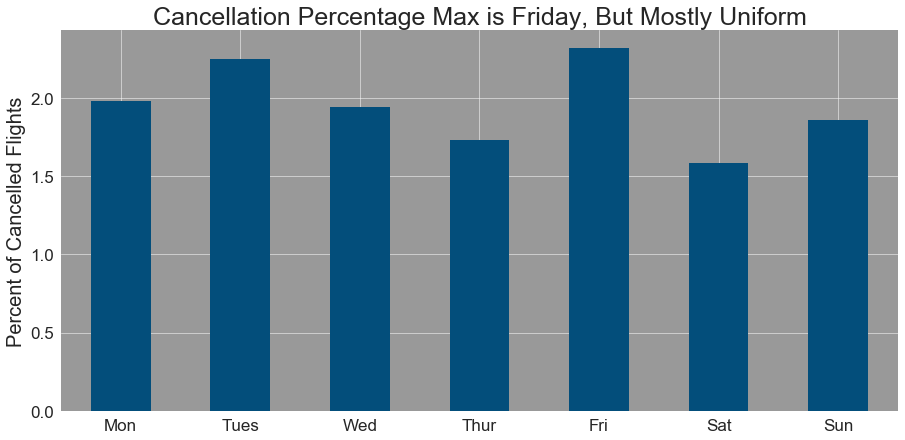

In [6]:
percent_cancelled_dayofweek = df.Cancelled.groupby(df.DayOfWeek).mean()*100
plotfunction(percent_cancelled_dayofweek, y_label='Percent of Cancelled Flights', x_labels=w,
             title='Cancellation Percentage Max is Friday, But Mostly Uniform'); plt.show()

In [7]:
percent_cancelled_month_dayofweek = df.Cancelled.groupby([df.Month, df.DayOfWeek]).mean()*100
percent_cancelled_month_dayofweek = percent_cancelled_month_dayofweek.unstack()
percent_cancelled_month_dayofweek.index = m
percent_cancelled_month_dayofweek.columns = w

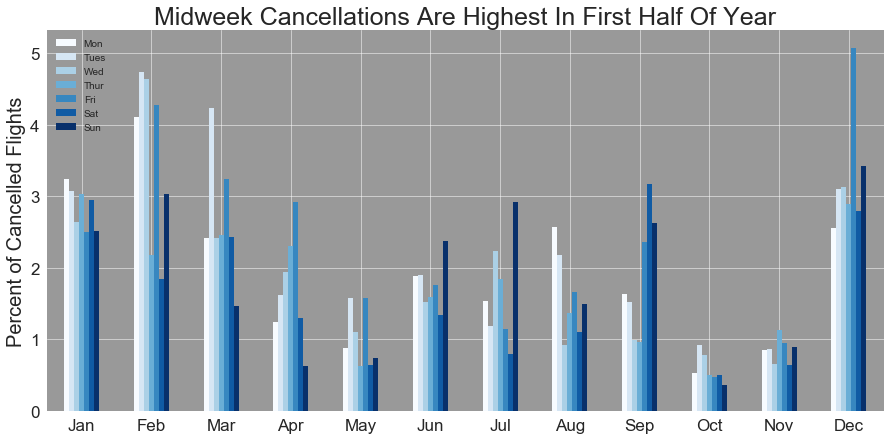

In [8]:
plotfunction(percent_cancelled_month_dayofweek, y_label='Percent of Cancelled Flights', x_labels=m,
    title='Midweek Cancellations Are Highest In First Half Of Year', simple=False); plt.show()

In [9]:
cancellation_type = df.Cancelled.groupby(df.CancellationCode).count()
cancellation_type = (cancellation_type / cancellation_type.sum())*100

can_type_month = df.Cancelled.groupby([df.CancellationCode, df.Month]).count().unstack()
can_type_month = ((can_type_month / can_type_month.sum())*100).T
can_type_month.columns = c

c_df = df.Cancelled.groupby([df.CancellationCode, df.Month, df.DayOfWeek]).count()
c_df = c_df.unstack()
c_df = (c_df / c_df.sum().sum())*100  # this makes it into percent
c_df.columns = w
# A = carrier, B = weather, C = NAS 'National Air System', D = security
carrier, weather, nas, security = c_df.loc['A'], c_df.loc['B'], c_df.loc['C'], c_df.loc['D']
carrier.index, weather.index, nas.index, security.index = m, m, m, ['Feb','Mar','May','Sep','Nov']

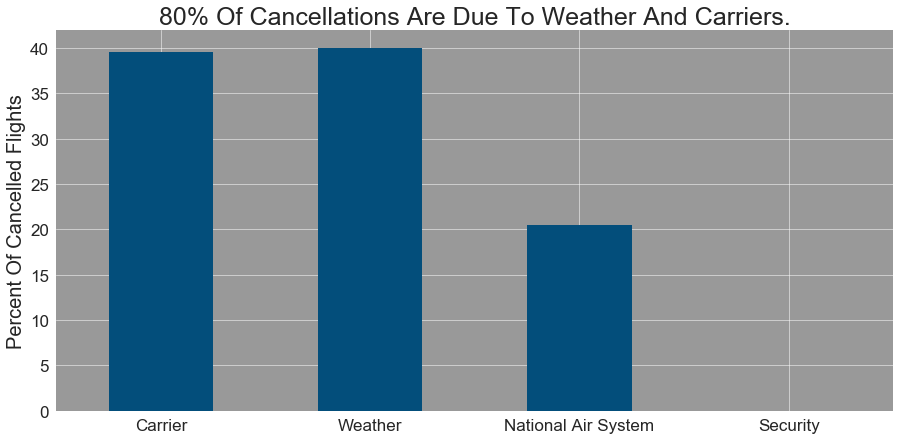

In [10]:
plotfunction(cancellation_type, y_label='Percent Of Cancelled Flights', x_labels=c,
             title='80% Of Cancellations Are Due To Weather And Carriers.'); plt.show()

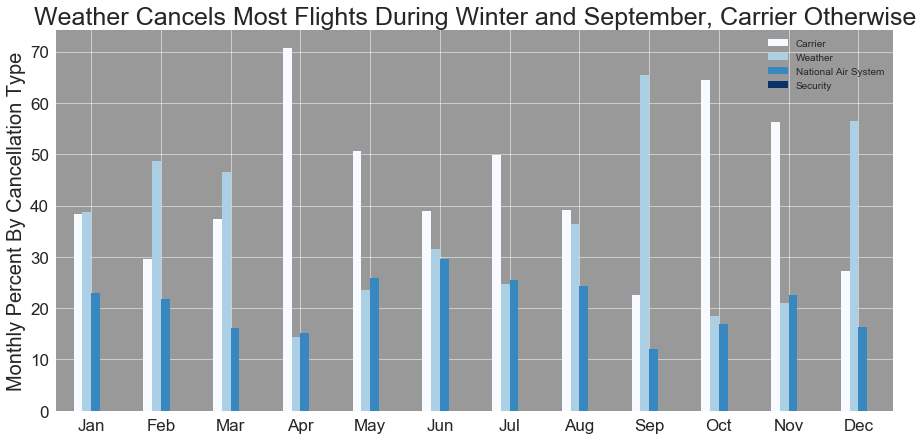

In [11]:
plotfunction(can_type_month, y_label='Monthly Percent By Cancellation Type', x_labels=m,
        title='Weather Cancels Most Flights During Winter and September, Carrier Otherwise',
             simple=False); plt.show()

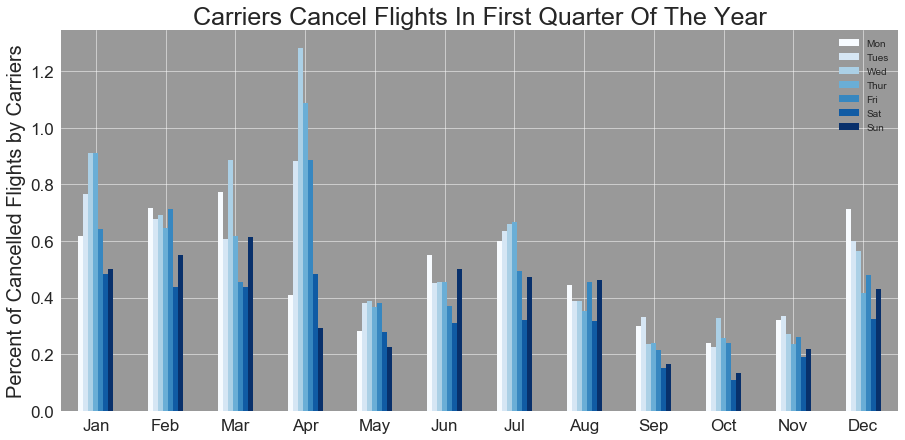

In [12]:
plotfunction(carrier, y_label='Percent of Cancelled Flights by Carriers', x_labels=m,
        title='Carriers Cancel Flights In First Quarter Of The Year', simple=False); plt.show()

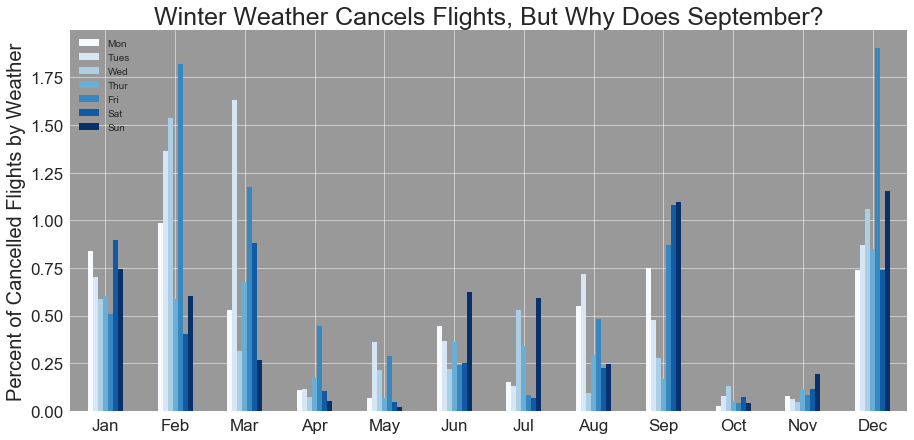

In [13]:
plotfunction(weather, y_label='Percent of Cancelled Flights by Weather', x_labels=m,
        title='Winter Weather Cancels Flights, But Why Does September?', simple=False); plt.show()

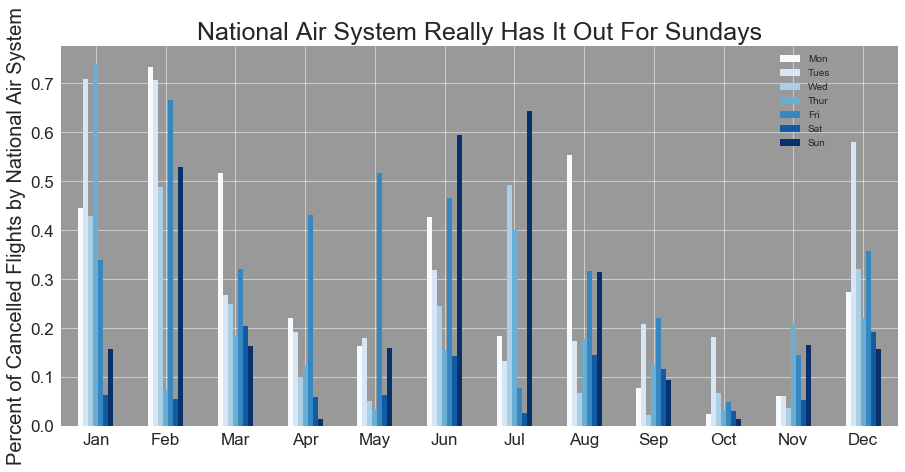

In [14]:
plotfunction(nas, y_label='Percent of Cancelled Flights by National Air System', x_labels=m,
title='National Air System Really Has It Out For Sundays', simple=False, l=(0.93, 1)); plt.show()

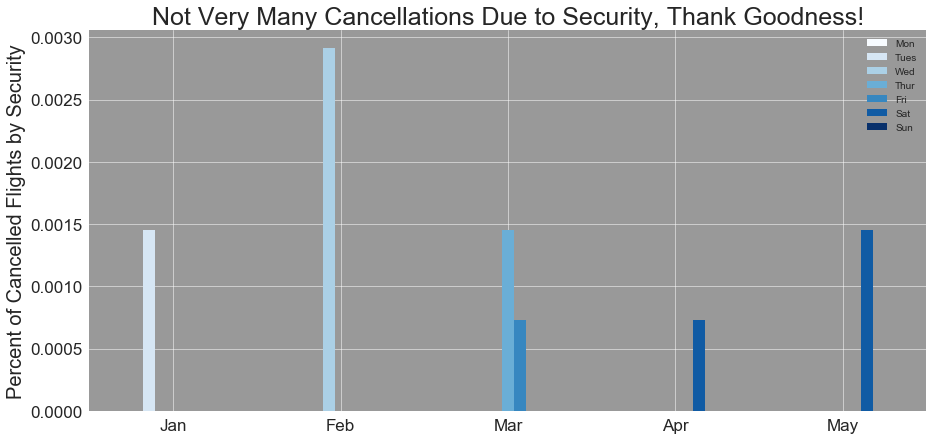

In [15]:
plotfunction(security, y_label='Percent of Cancelled Flights by Security', x_labels=m,
    title='Not Very Many Cancellations Due to Security, Thank Goodness!', simple=False); plt.show()

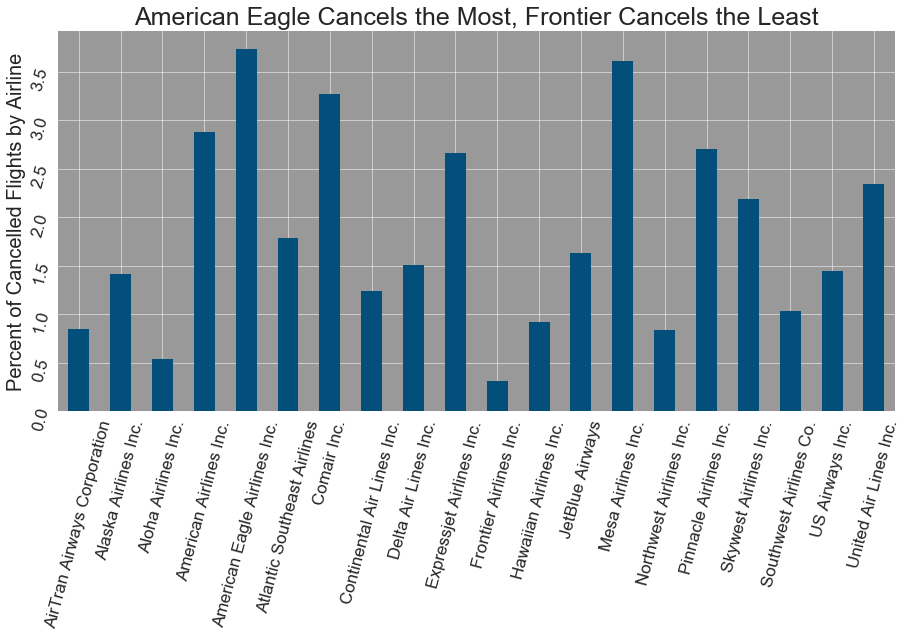

In [16]:
percent_cancelled_airline = df.Cancelled.groupby(df.Description).mean()*100
plotfunction(percent_cancelled_airline, y_label='Percent of Cancelled Flights by Airline',
             r=75, title='American Eagle Cancels the Most, Frontier Cancels the Least'); plt.show()

## Look at flight delays

In [17]:
x = df[['ArrDelay', 'DepDelay', 'Description']]
arr = x[['ArrDelay', 'Description']]
arr['Delay'] = 'Arrival'
arr.columns = ['Time', 'Airline', 'Delay']

dep = x[['DepDelay', 'Description']]
dep['Delay'] = 'Departure'
dep.columns = ['Time', 'Airline', 'Delay']

violin = pd.concat([arr, dep], axis=0)

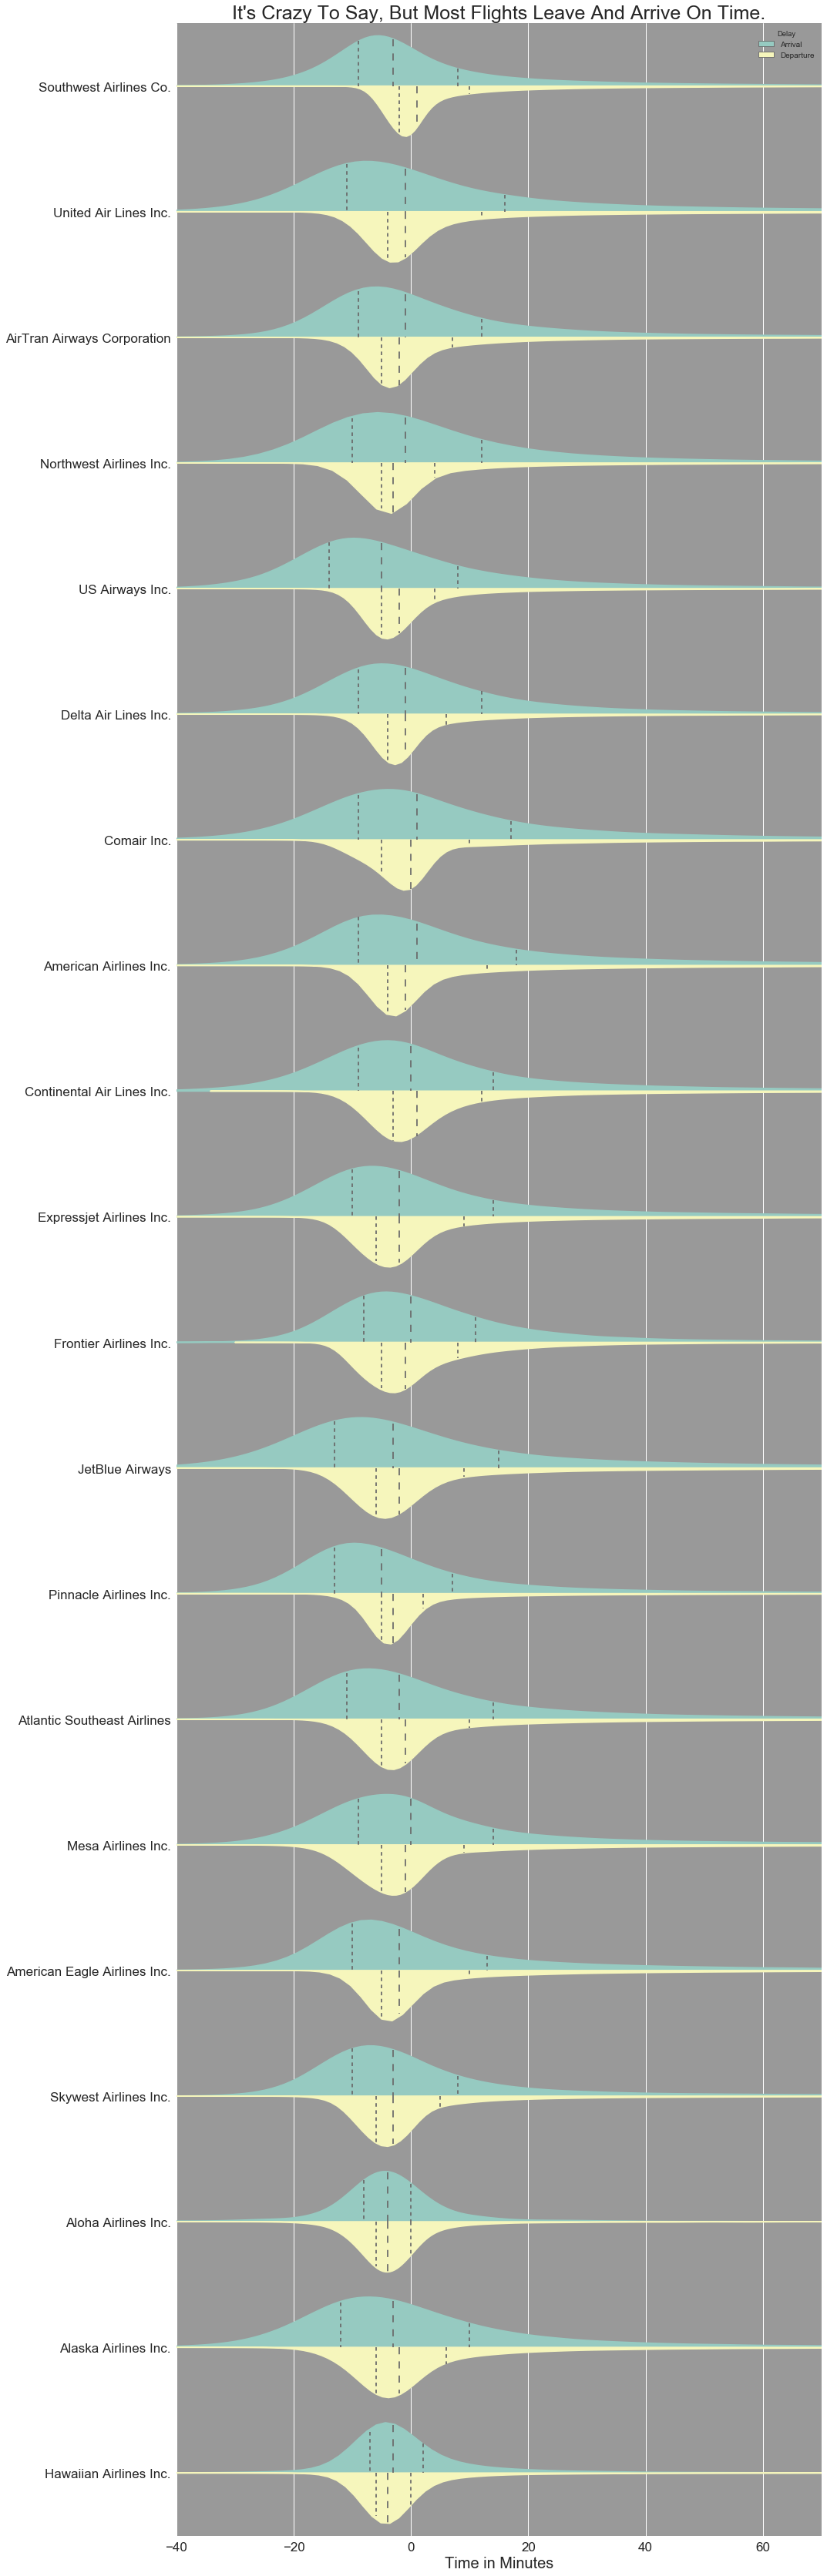

In [18]:
plt.figure(figsize=(15,60))
ax = sns.violinplot(x="Time", y="Airline", hue="Delay", data=violin, inner="quartile",
                    split=True, palette="Set3", gridsize=1000, scale='width')
ax.set_xlim(-40, 70)
ax.set_xlabel('Time in Minutes', fontsize=20)
ax.tick_params('both', labelsize=17, rotation=0)
ax.set_title("It's Crazy To Say, But Most Flights Leave And Arrive On Time.", fontsize=25)
ax.set_ylabel(''); plt.show()

In [19]:
airline_delays = df[['ArrDelay', 'DepDelay']].groupby(df.Description)
mean = airline_delays.mean()
median = airline_delays.median()
airline_delays = pd.concat([mean, median], axis=1).round(decimals=1)
airline_delays.columns = ['mean_arival_delay', 'mean_depart_delay',
                          'median_arival_delay', 'median_depart_delay']

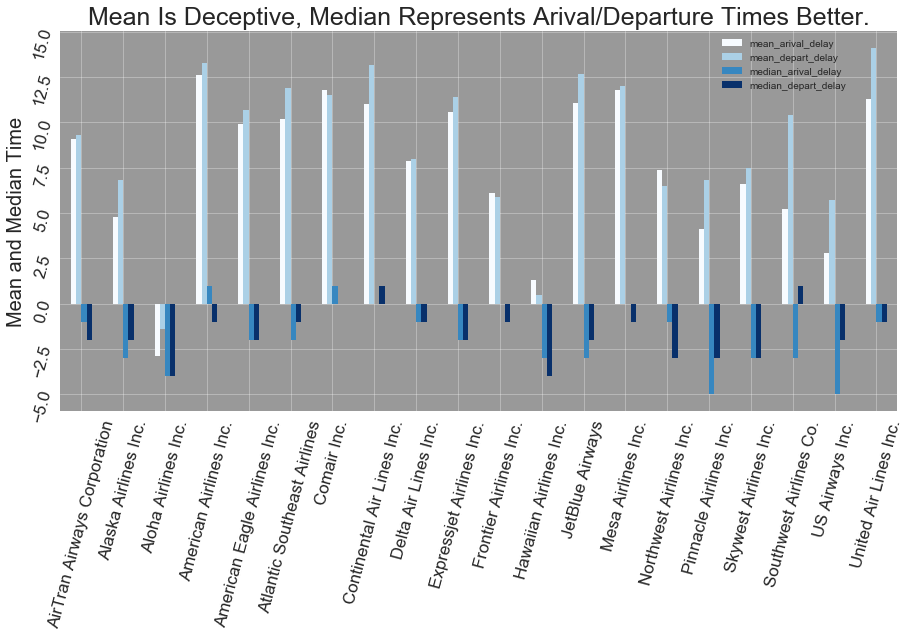

In [20]:
plotfunction(airline_delays, y_label='Mean and Median Time',r=75, simple=False, l=(0.95, 0.82),
    title='Mean Is Deceptive, Median Represents Arival/Departure Times Better.', a=.3); plt.show()

In [21]:
airline_delays_m = df[['ArrDelay', 'DepDelay']].groupby([df.Description, df.Month])
median = airline_delays_m.median().unstack()
median_arr = median.loc[:,'ArrDelay']
median_dep = median.loc[:, 'DepDelay']
median_arr.columns, median_dep.columns = m, m

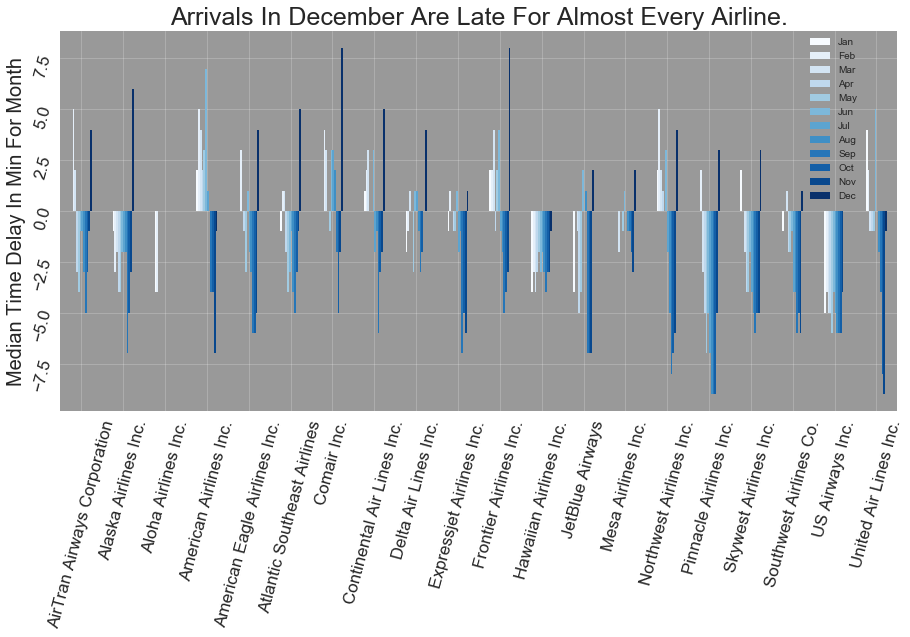

In [22]:
plotfunction(median_arr, y_label='Median Time Delay In Min For Month', r=75, l=(0.885, 0.53), a=.2,
        title='Arrivals In December Are Late For Almost Every Airline.', simple=False); plt.show()

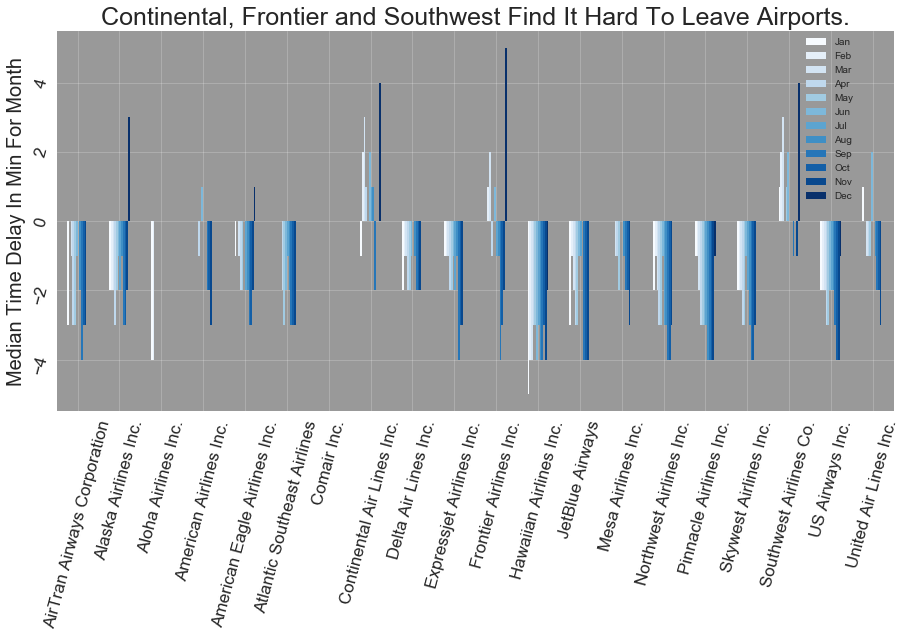

In [23]:
plotfunction(median_dep, y_label='Median Time Delay In Min For Month', r=75, l=(0.885, 0.53), a=.2,
        title='Continental, Frontier and Southwest Find It Hard To Leave Airports.',simple=False)
plt.show()

## Summary

After Taking a Look at the Cancellations and Delays for the year of 2008 I can conclude some things.

##### Cancellations

- 80% of cancelations are due to either weather or the airline.
- Cancellations are higher overall during the winter months, but surprisingly the month of September has a large amount of cancellations.
- There are very few cancellations due to security, thank god.
- The distribution of cancellations by individual airlines is a bit surprising, where airlines like Jetblue (a often joked about airline) has less cancellations than other more liked and known ones.

##### Delays

- The most surprising thing is that most flights for all airlines not only are on time but are early; both on arrival and departure. I guess delays really stick with our memory.
  - median is the best measure of the center of this data set because it is less affected by the outliers
- While the above is true, arrivals in December for most airlines are late, this makes sence of course because of the weather.
- Departures in December are mostly on time, although Southwest, Continental and Frontier seem to find it hard to leave. I guess they just get colder than the other airlines.